In [9]:
dataset_name = "hou"

In [10]:
%reload_ext autoreload
%autoreload 2

In [12]:
import datasets
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 12)


dataset_module = datasets.datasets_by_name_all[dataset_name]
x,y,metadata = dataset_module.load(dropna=True,verbose=True)
y = datasets.map_y_em(y,dataset_name)

# generate dataframe with both x and y
xy = pd.concat([x,y],axis=1)
xym = pd.concat([x,y,metadata],axis=1)
xym.describe()



Warning loading data from Hou2016_VPHAS-SDSS-IPHAS-2MASS.csv:
Dropped 27 rows with missing values. 
Rows (original):   1034
Rows (after drop): 1007


,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag,em,e_rmag,...,RAJ2000,e_gmag,e_Kmag,k,k_err,e_Hmag,DEJ2000,e_umag,w1,h_err
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.000000,...,1007.000000,1007.000000,983.000000,917.000000,900.000000,998.000000,1007.000000,1007.000000,917.000000,910.000000
mean,17.947877,16.366036,15.557746,15.048451,15.347805,14.248893,13.983537,13.843248,1.0,0.003088,...,87.987971,0.005229,0.067548,13.724305,0.062864,0.055280,24.022729,0.061813,13.614494,0.051823
std,1.660195,1.368795,1.418495,1.370818,1.440670,1.329480,1.331519,1.341729,0.0,0.004853,...,8.727635,0.003334,0.046918,1.333291,0.044079,0.034933,9.064148,1.272444,1.381846,0.032369
min,13.616000,12.398000,12.100000,11.590000,11.450000,10.501000,9.331000,8.578000,1.0,0.000000,...,54.744007,0.000000,0.017000,8.578000,0.017000,0.019000,0.735073,0.003000,7.401000,0.019000
25%,16.505000,15.296000,14.365000,13.825000,14.125000,13.083000,12.900500,12.767000,1.0,0.000000,...,84.995892,0.004000,0.028000,12.628000,0.027000,0.027000,21.160213,0.008000,12.565000,0.027000
50%,18.217000,16.618000,15.950000,15.430000,15.750000,14.586000,14.294000,14.133000,1.0,0.000000,...,87.834310,0.004000,0.052000,13.963000,0.046000,0.043500,23.277021,0.014000,13.843000,0.040000
75%,19.226000,17.470500,16.755000,16.225000,16.560000,15.405500,15.085000,14.954000,1.0,0.010000,...,91.464080,0.006000,0.097000,14.848000,0.089000,0.073750,28.799729,0.025000,14.758000,0.068000
max,24.651000,21.633000,19.330000,18.290000,18.890000,17.013000,16.700000,17.150000,1.0,0.040000,...,104.905030,0.047000,0.273000,17.006000,0.229000,0.270000,54.285438,40.354000,16.944000,0.192000


# Variable visualization

Text(0.5, 1.0, 'Per class boxplots')

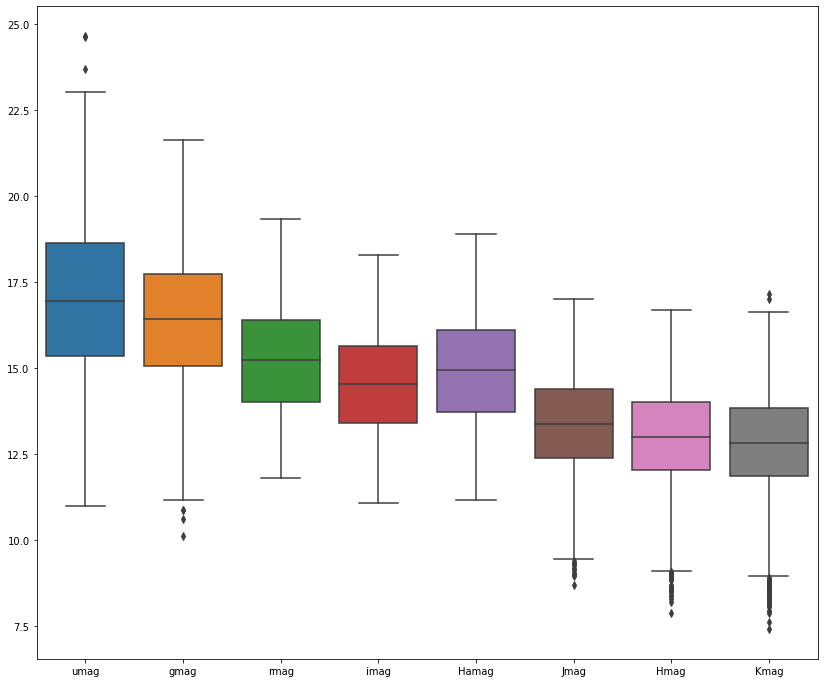

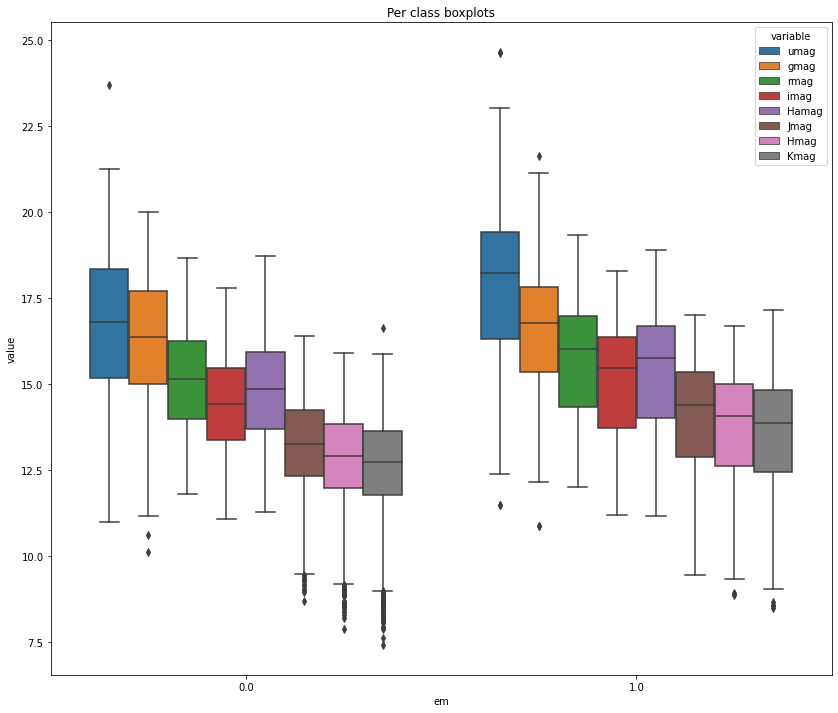

In [4]:

sn.boxplot(data=x)

plt.figure()
xy_long = pd.melt(xy, id_vars='em')
sn.boxplot(x='em', y='value', hue='variable', data=xy_long)
plt.title("Per class boxplots")
        

<AxesSubplot:>

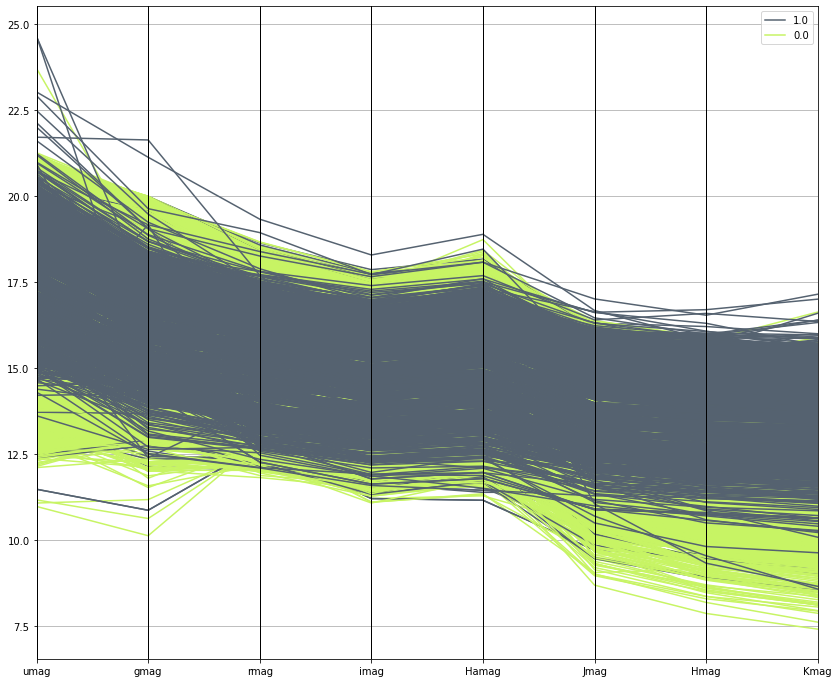

In [5]:
pd.plotting.parallel_coordinates(xy,"em",color=('#556270','#C7F464'))


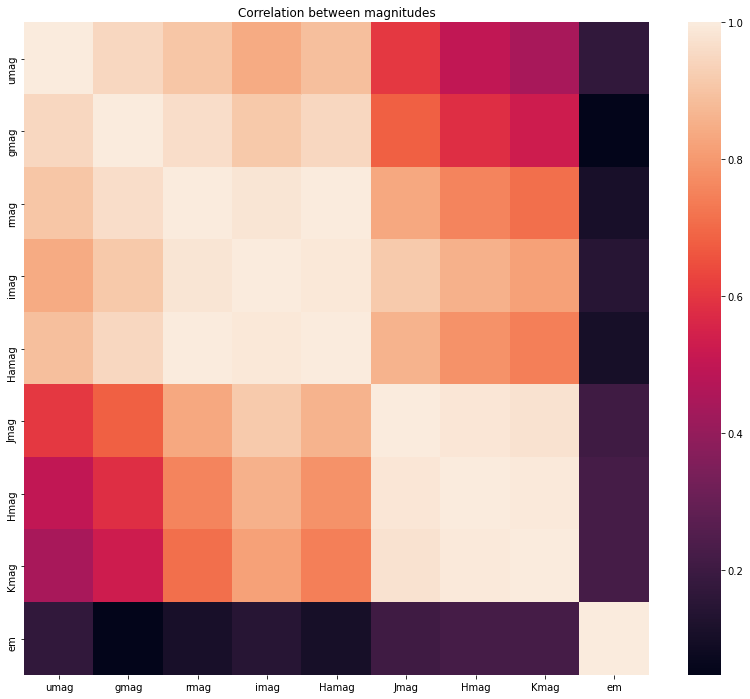

Text(0.5, 0.98, 'Scatterplots between magnitudes')

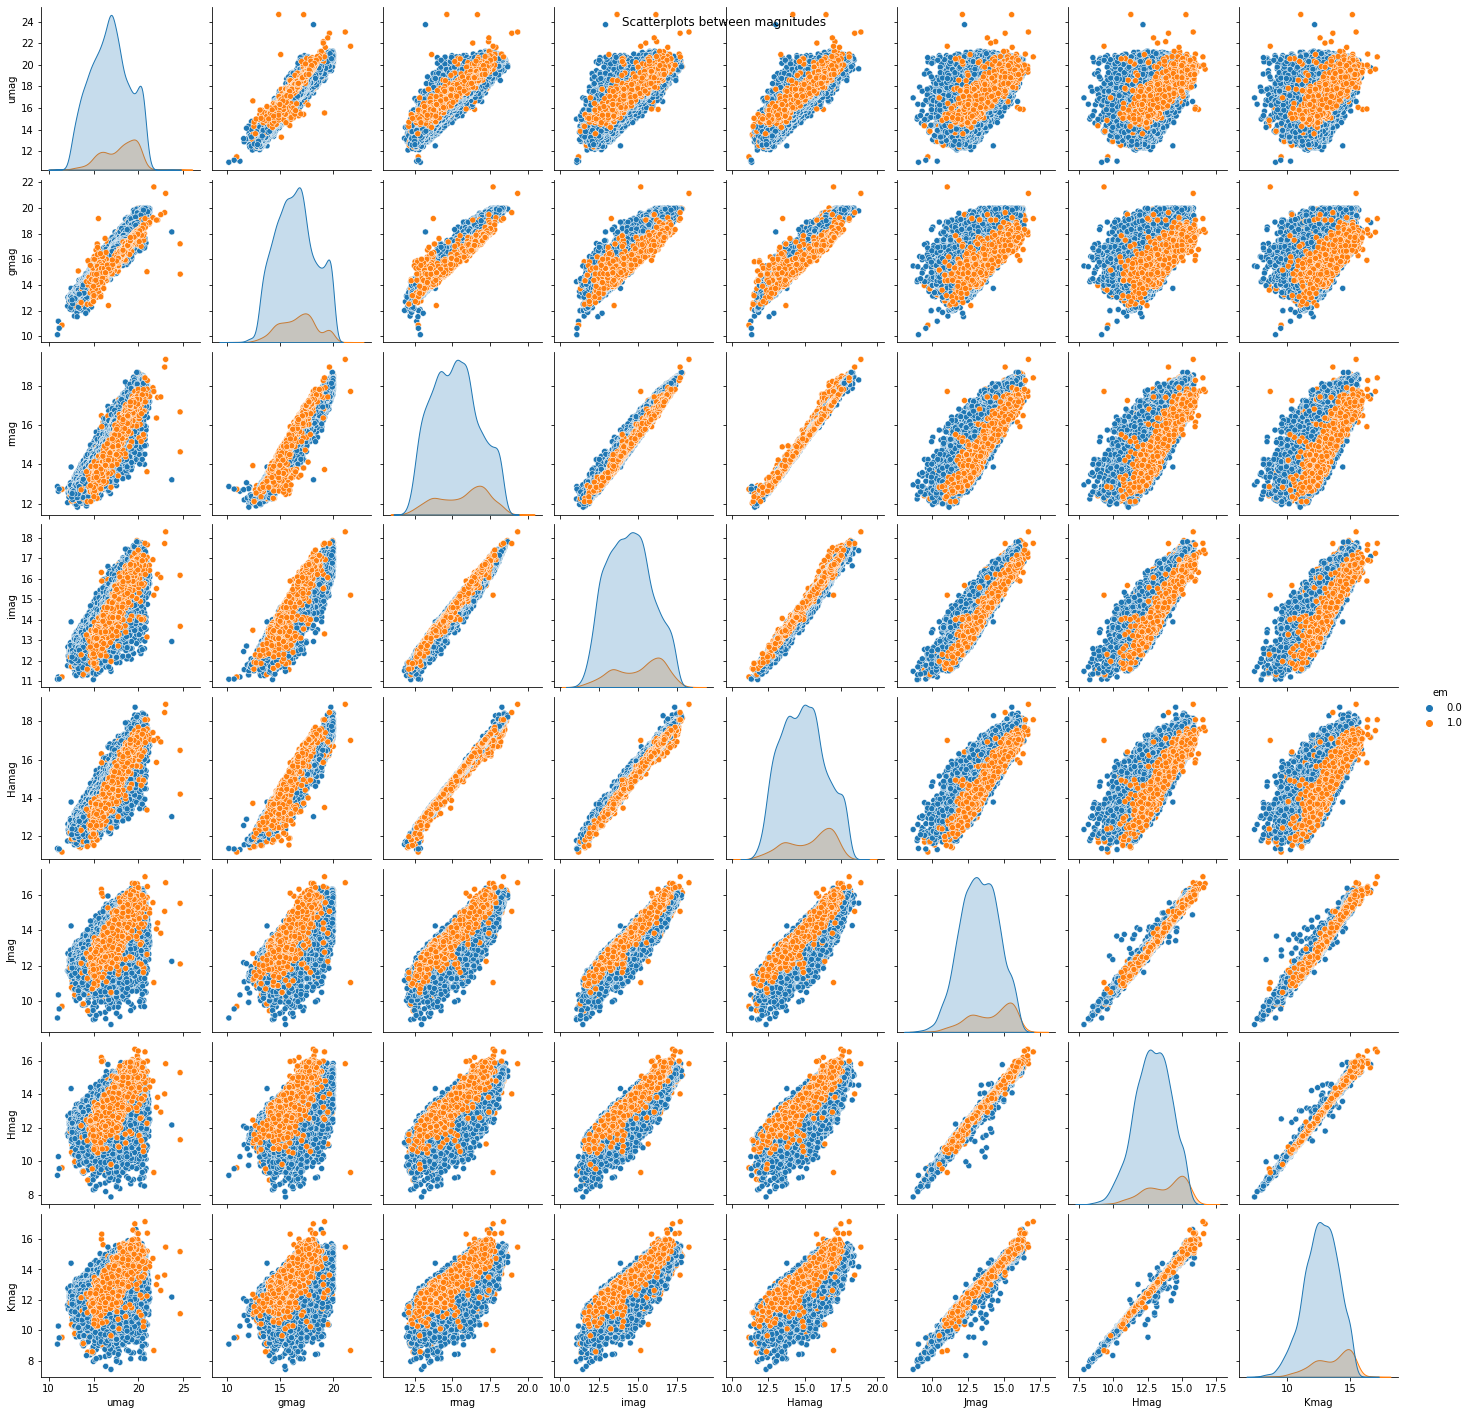

In [6]:
sn.heatmap(xy.corr().abs())
plt.title("Correlation between magnitudes")
plt.show()

sn.pairplot(xy,hue="em")
plt.suptitle("Scatterplots between magnitudes")
# axes=pd.plotting.scatter_matrix(x,c=y["em"],alpha=0.9,grid=False,figsize=(14,12))


# Outlier detection via confidence interval

In [7]:
from scipy import stats
m = len(x.columns) # number of columns = number of hypothesis
confidence= 0.99 
adjusted_confidence = 1- (1-confidence)/m  # bonferroni-adjusted confidence 
max_zscore = stats.norm.ppf(adjusted_confidence)
print(f"Confidence  (desired): {confidence}")
print(f"Confidence (adjusted): {adjusted_confidence}")
print(f"Z-score    (adjusted): {max_zscore}")

indices = (np.abs(stats.zscore(x-x.mean())) > max_zscore).any(axis=1)
outliers_x = x[indices]
if dataset_name != "all_em":
    outliers_metadata = metadata[indices]
    outliers_x = pd.concat([outliers_x,outliers_metadata],axis=1)
outliers_x

Confidence  (desired): 0.98
Confidence (adjusted): 0.9975
Z-score    (adjusted): 2.807033768343811


,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag
40,23.710,18.130,13.210,12.940,13.010,12.250,12.170,12.180
43,11.080,11.180,12.630,11.210,11.290,10.360,10.280,10.270
76,10.980,10.130,12.870,11.100,11.350,9.060,9.160,9.080
89,11.480,10.870,12.730,11.210,11.160,9.710,9.610,9.520
90,11.480,10.870,12.730,11.210,11.160,9.710,9.610,9.520
144,11.170,10.630,12.740,11.110,11.320,9.570,9.560,9.490
264,19.450,17.230,14.220,12.360,13.630,9.650,8.910,8.510
275,17.560,16.460,13.810,12.200,13.270,9.780,9.140,8.750
299,17.129,15.965,13.610,12.248,13.113,9.942,9.267,8.845
314,17.230,15.975,13.523,12.100,13.031,9.670,8.930,8.536


# Outlier detection via IQR

In [16]:
iqr_factor=1.5
q25,q75=x.quantile(0.25),x.quantile(0.75)
iqr=q75-q25
min_values = q25-iqr_factor*iqr
max_values = q75+iqr_factor*iqr
# ou
indices = (np.logical_or(x<min_values,x>max_values)).any(axis=1)
outliers_x = x[indices]
if dataset_name != "all_em":
    outliers_metadata = metadata[indices]
    outliers_x = pd.concat([outliers_x,outliers_metadata],axis=1)
outliers_x

,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag
40,23.710,18.130,13.210,12.940,13.010,12.250,12.170,12.180
76,10.980,10.130,12.870,11.100,11.350,9.060,9.160,9.080
89,11.480,10.870,12.730,11.210,11.160,9.710,9.610,9.520
90,11.480,10.870,12.730,11.210,11.160,9.710,9.610,9.520
144,11.170,10.630,12.740,11.110,11.320,9.570,9.560,9.490
264,19.450,17.230,14.220,12.360,13.630,9.650,8.910,8.510
275,17.560,16.460,13.810,12.200,13.270,9.780,9.140,8.750
299,17.129,15.965,13.610,12.248,13.113,9.942,9.267,8.845
314,17.230,15.975,13.523,12.100,13.031,9.670,8.930,8.536
321,17.566,15.969,13.405,11.925,12.928,9.317,8.560,8.115


# Analysis of q-features ($q_3$) (all magnitudes)

In [9]:
x_np=x.to_numpy()
import qfeatures
coefficients = dataset_module.coefficients
systems = dataset_module.systems
coefficients_np = np.array([coefficients[k] for k in x.columns])
systems = [systems[k] for k in x.columns]
q=qfeatures.calculate(x_np,coefficients_np,x.columns,systems,combination_size=3)
m = q.magnitudes

q_df = pd.DataFrame(m, columns = q.column_names)
q_df.describe()

,umag_gmag_rmag,umag_gmag_imag,umag_gmag_Hamag,umag_gmag_Jmag,umag_gmag_Hmag,umag_gmag_Kmag,umag_rmag_imag,umag_rmag_Hamag,umag_rmag_Jmag,umag_rmag_Hmag,...,imag_Hamag_Jmag,imag_Hamag_Hmag,imag_Hamag_Kmag,imag_Jmag_Hmag,imag_Jmag_Kmag,imag_Hmag_Kmag,Hamag_Jmag_Hmag,Hamag_Jmag_Kmag,Hamag_Hmag_Kmag,Jmag_Hmag_Kmag
count,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,...,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000
mean,-0.063921,-0.709701,-0.263438,-4.141992,-7.705369,-12.502502,0.840664,1.400112,-3.709929,-8.558077,...,0.537134,1.436861,2.624102,0.315014,-0.720819,0.799348,0.343245,-1.142496,0.934883,0.237285
std,0.658024,0.703104,0.668365,1.920013,3.425802,5.545913,0.771068,0.943564,1.897399,3.997383,...,0.273023,0.694547,1.275666,0.375150,0.627362,0.622198,0.506861,0.925879,0.801468,0.194781
min,-6.198398,-7.366959,-6.524593,-15.935431,-29.070391,-46.138137,-4.042982,-3.367383,-15.186556,-33.829435,...,-0.156500,-0.411696,-0.772131,-6.482065,-13.751588,-11.218902,-9.400609,-19.827601,-15.024588,-2.622131
25%,-0.483868,-1.148602,-0.695596,-5.547403,-10.231500,-16.576010,0.330058,0.764346,-5.096611,-11.436261,...,0.314993,0.895750,1.635833,0.089261,-0.989706,0.460582,0.064652,-1.545882,0.516039,0.126850
50%,-0.202892,-1.020696,-0.427495,-4.001958,-7.360348,-11.786373,0.722339,1.295589,-3.488778,-8.058565,...,0.497042,1.315304,2.406157,0.310435,-0.644588,0.783667,0.348696,-1.020052,0.925157,0.223863
75%,0.079946,-0.450000,-0.102033,-2.759167,-5.125587,-8.249484,1.310099,1.996963,-2.278667,-5.460239,...,0.729924,1.944413,3.540333,0.544804,-0.366000,1.161458,0.641043,-0.602605,1.386402,0.336935
max,9.704550,9.063398,9.472379,5.653403,4.414391,4.119078,10.171579,10.305607,7.726667,5.797391,...,1.753681,5.368848,9.922418,4.936783,4.142765,7.507065,6.374304,5.383026,9.521608,2.715843


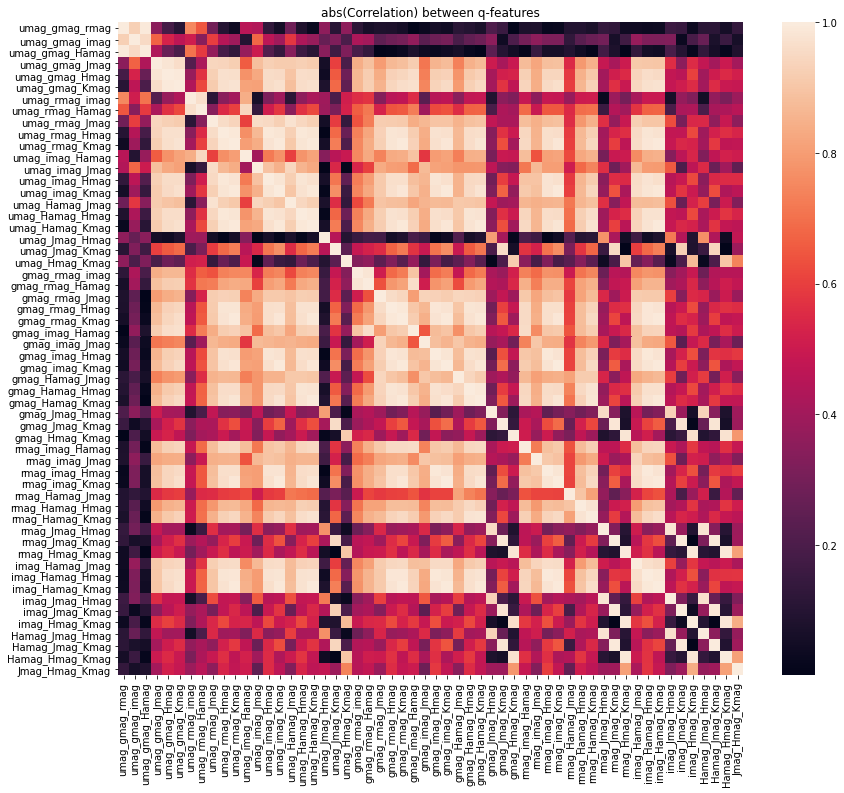

In [10]:
sn.heatmap(q_df.corr().abs())
plt.title("abs(Correlation) between q-features")
plt.show()

# Analysis of q-features ($q_4$) (calculated by system to avoid combinatory explosion)



In [17]:
x_np=x.to_numpy()
import qfeatures
coefficients = dataset_module.coefficients
systems = dataset_module.systems
coefficients_np = np.array([coefficients[k] for k in x.columns])
systems = [systems[k] for k in x.columns]
q= qfeatures.calculate(x_np,coefficients_np,x.columns,systems,combination_size=4,by_system=False)

m = q.magnitudes

q_df = pd.DataFrame(m, columns = q.column_names)
q_df.describe()


,umag_gmag_rmag_imag,umag_gmag_rmag_Hamag,umag_gmag_rmag_Jmag,umag_gmag_rmag_Hmag,umag_gmag_rmag_Kmag,umag_gmag_imag_Hamag,umag_gmag_imag_Jmag,umag_gmag_imag_Hmag,umag_gmag_imag_Kmag,umag_gmag_Hamag_Jmag,...,rmag_imag_Hmag_Kmag,rmag_Hamag_Jmag_Hmag,rmag_Hamag_Jmag_Kmag,rmag_Hamag_Hmag_Kmag,rmag_Jmag_Hmag_Kmag,imag_Hamag_Jmag_Hmag,imag_Hamag_Jmag_Kmag,imag_Hamag_Hmag_Kmag,imag_Jmag_Hmag_Kmag,Hamag_Jmag_Hmag_Kmag
count,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,...,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000
mean,-0.776395,-1.447490,-0.782595,-0.835957,-0.835225,-0.511079,-0.786352,-0.864546,-0.860366,-0.702995,...,-0.027547,0.044481,0.063966,0.096861,-0.063955,0.256898,0.207614,0.124408,-0.036409,-0.160816
std,0.688391,1.001902,0.735795,0.732850,0.737663,0.696245,0.775468,0.765475,0.770012,0.736073,...,0.469021,0.131383,0.121125,0.162578,1.204081,0.261094,0.225718,0.353685,0.745286,1.081049
min,-4.461667,-9.456471,-4.476063,-4.850924,-4.838054,-4.482791,-4.484788,-5.037768,-4.998903,-4.484183,...,-11.128312,-1.920269,-1.544396,-3.161688,-29.733026,-2.258692,-0.997585,-3.696948,-18.604714,-26.571338
25%,-1.231108,-1.919324,-1.304981,-1.344757,-1.348278,-0.981256,-1.351955,-1.402552,-1.400800,-1.228884,...,-0.178747,-0.013288,0.012616,0.032396,-0.411149,0.112750,0.086386,-0.023149,-0.247286,-0.462565
50%,-1.074867,-1.639059,-1.080535,-1.108881,-1.106309,-0.771860,-1.068364,-1.112032,-1.103858,-0.982415,...,0.001429,0.044500,0.062754,0.097909,0.005727,0.213692,0.170005,0.096987,0.003857,-0.095338
75%,-0.460083,-0.995000,-0.384264,-0.436976,-0.435921,-0.204186,-0.319909,-0.411944,-0.404644,-0.318085,...,0.160006,0.094019,0.106761,0.159656,0.378740,0.349115,0.284372,0.228260,0.230286,0.239396
max,8.080167,6.984824,8.072969,7.835751,7.876200,8.513209,8.068606,7.718432,7.789034,8.203239,...,5.245974,1.585385,1.528213,1.549026,15.044831,5.371269,4.420531,7.966623,9.798857,13.495805


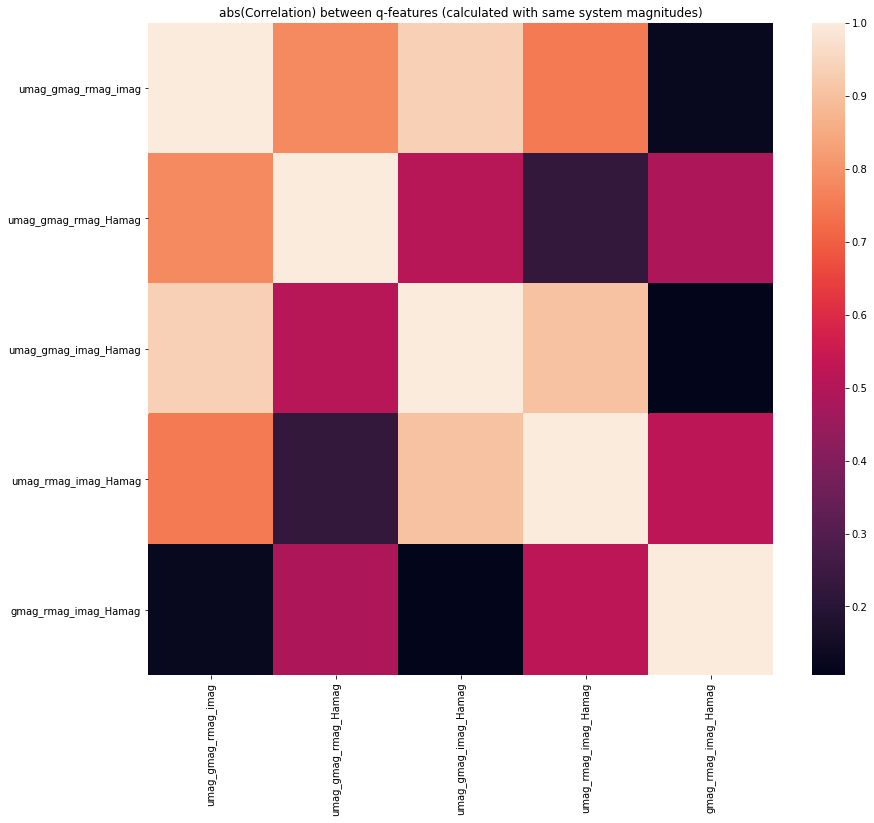

In [12]:
sn.heatmap(q_df.corr().abs())
_=plt.title("abs(Correlation) between q4-features (calculated with same system magnitudes)")

In [ ]:
q_dfy=pd.concat([q_df,y],axis=1)
sn.pairplot(q_dfy,hue="em")
_=plt.suptitle("Scatter plots between q4-features (calculated with same system magnitudes)")

KeyboardInterrupt: 